In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Для решения данной системы дифференциальных уравнений Колмогорова, можно использовать библиотеку scipy.integrate.odeint или scipy.integrate.solve_ivp в Python. Она обеспечивает численное решение систем дифференциальных уравнений. Ваша система уравнений выглядит как система обыкновенных дифференциальных уравнений первого порядка.

In [2]:
def system(p, t):
    p_0, p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10 = p

    dp_0 = -0.5*p_0+0.4*p_2
    dp_1 = 0.5*p_0-1.17*p_1+0.4*p_4
    dp_2 = 0.67*p_1-0.9*p_2
    dp_3 = 0.5*p_1-1.17*p_3+0.4*p_6
    dp_4 = 0.5*p_2+0.67*p_3-0.9*p_4
    dp_5 = 0.5*p_3-1.17*p_5+0.4*p_8
    dp_6 = 0.5*p_4+0.67*p_5-0.9*p_6
    dp_7 = 0.5*p_5-1.17*p_7+0.4*p_10
    dp_8 = 0.5*p_6+0.67*p_7-0.9*p_8
    dp_9 = 0.5*p_7-0.67*p_9
    dp_10 = 0.5*p_8+0.67*p_9-0.4*p_10

    return [dp_0, dp_1, dp_2, dp_3, dp_4, dp_5, dp_6, dp_7, dp_8, dp_9, dp_10]

# Начальные условия (можно изменить в соответствии с вашими требованиями)
p_0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Временной интервал (можно изменить в соответствии с вашими требованиями)
t = np.linspace(0, 10, 1000)

# Решение системы ОДУ
solution = odeint(system, p_0, t)

# solution является массивом размера len(t) x len(p_0). Каждая строка - это состояние системы в конкретный момент времени

В этом коде мы определяем функцию system, которая принимает текущее состояние системы p и текущее время t, и возвращает производные каждого из состояний. Затем мы используем функцию odeint, чтобы численно интегрировать эту систему вдоль времени.

Обратите внимание, что вам нужно будет указать начальные условия для каждого p_i и временной интервал, для которого вы хотите решить систему. Это зависит от вашей конкретной задачи(от начальных условий).

`В контексте систем дифференциальных уравнений, обычно подразумевается, что P_i - это функции времени, и dP_i/dt обозначает скорость их изменения с течением времени. Поэтому мое изначальное предположение о том, что P_i и p_i обозначают одно и то же, было основано на этом общепринятом соглашении`.

Как "один ответ" на систему дифференциальных уравнений обычно подразумевается набор решений всех уравнений системы в определенный момент времени.

Таким образом, если вам нужно состояние системы в конечный момент времени (например, в конце рассматриваемого временного интервала), вы можете просто взять последнюю строку полученного решения. В контексте представленного кода это будет solution[-1]. Это будет массив, содержащий значения всех P_i в последний момент времени.

Например, если вы хотите узнать значения всех P_i через 10 единиц времени, вы можете сделать следующее:

In [3]:
final_state = solution[-1]
print("Итоговое решение системы:")
for i, p in enumerate(final_state):
    print(f"P_{i} = {p}")

Итоговое решение системы:
P_0 = 0.07215961494835206
P_1 = 0.07316722805647545
P_2 = 0.06336415970035192
P_3 = 0.07532925747129361
P_4 = 0.10154960733974526
P_5 = 0.07272909385159684
P_6 = 0.11526926351373712
P_7 = 0.08276803080273841
P_8 = 0.1190816211770893
P_9 = 0.050826976289334816
P_10 = 0.17375514684928564


# Создаем гистограмму

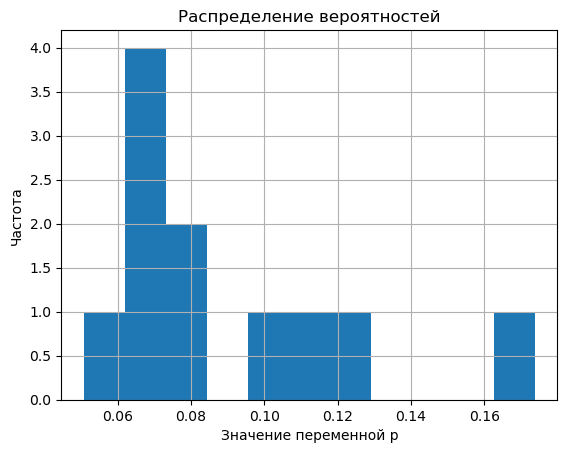

In [4]:
# Создание гистограммы
num_bins = len(final_state)  # Количество бинов равно количеству переменных
plt.hist(final_state, bins=num_bins, range=(min(final_state), max(final_state)))
plt.xlabel('Значение переменной p')
plt.ylabel('Частота')
plt.title('Распределение вероятностей')
plt.grid(True)
plt.show()

# Заметки общие:

ОДУ - "Обыкновенные Дифференциальные Уравнения"

Символ dP_0/dt в математике обычно обозначает производную функции P_0(t) по времени.

В контексте дифференциальных уравнений, это означает скорость, с которой переменная P_0 изменяется по мере изменения времени. Таким образом, выражение dP_0/dt = -0.5*p_0+0.4*p_2 описывает, как P_0 изменяется во времени в зависимости от текущих значений p_0 и p_2.

В Python, мы обычно моделируем это, записывая функцию, которая принимает текущее время t и текущие значения переменных p_0, p_1, ..., p_10 и возвращает значения dP_0/dt, dP_1/dt, ..., dP_10/dt.

# Заметки 2
После решения системы дифференциальных уравнений методом odeint, вы получите двумерный массив solution, где каждая строка соответствует временной точке из заданного интервала времени t, а каждый столбец соответствует одной из переменных P_i.

То есть, если вы хотите получить решение для P_0 в первый момент времени, вы должны обратиться к solution[0, 0]. Если вы хотите получить решение для P_1 во второй момент времени, вы должны обратиться к solution[1, 1]. И так далее.

В этом контексте, "решение" означает численное представление того, как P_i изменяется с течением времени, основанное на системе дифференциальных уравнений и начальных условиях. Таким образом, вы можете использовать solution для исследования поведения системы во времени или для построения графиков изменения P_i.

In [5]:
print(solution[0, 0])
print(solution[1, 1]) # и т.д.

1.0
0.004963368207351651
